In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Calling dataset
sd=pd.read_csv('Space Server Dataset')

In [3]:
sd

objid          ra        dec         u         g         r  \
0     1.237650e+18  183.531326   0.089693  19.47406  17.04240  15.94699   
1     1.237650e+18  183.598371   0.135285  18.66280  17.21449  16.67637   
2     1.237650e+18  183.680207   0.126185  19.38298  18.19169  17.47428   
3     1.237650e+18  183.870529   0.049911  17.76536  16.60272  16.16116   
4     1.237650e+18  183.883288   0.102557  17.55025  16.26342  16.43869   
...            ...         ...        ...       ...       ...       ...   
9995  1.237650e+18  131.316413  51.539547  18.81777  17.47053  16.91508   
9996  1.237650e+18  131.306083  51.671341  18.27255  17.43849  17.07692   
9997  1.237650e+18  131.552562  51.666986  18.75818  17.77784  17.51872   
9998  1.237650e+18  131.477151  51.753068  18.88287  17.91068  17.53152   
9999  1.237650e+18  131.665012  51.805307  19.27586  17.37829  16.30542   

             i         z   run  rerun  camcol  field     specobjid   class  \
0     15.50342  15.22531   752    301       4    267  3.722360e+18    STAR   
1     16.48922  16.39150   752    301       4    267  3.638140e+17    STAR   
2     17.08732  16.80125   752    301       4    268  3.232740e+17  GALAXY   
3     15.98233  15.90438   752    301       4    269  3.722370e+18    STAR   
4     16.55492  16.61326   752    301       4    269  3.722370e+18    STAR   
...        ...       ...   ...    ...     ...    ...           ...     ...   
9995  16.68305  16.50570  1345    301       3    161  5.033450e+17  GALAXY   
9996  16.71661  16.69897  1345    301       3    162  5.033400e+17  GALAXY   
9997  17.43302  17.42048  1345    301       3    162  8.222620e+18    STAR   
9998  17.36284  17.13988  1345    301       3    163  5.033400e+17  GALAXY   
9999  15.83548  15.50588  1345    301       3    163  5.033410e+17  GALAXY   

      redshift  plate    mjd  fiberid  
0    -0.000009   3306  54922      491  
1    -0.000055    323  51615      541  
2     0.123111    287  52023      513  
3    -0.000111   3306  54922      510  
4     0.000590   3306  54922      512  
...        ...    ...    ...      ...  
9995  0.027583    447  51877      246  
9996  0.117772    447  51877      228  
9997 -0.000402   7303  57013      622  
9998  0.014019    447  51877      229  
9999  0.118417    447  51877      233  

[10000 rows x 18 columns]

Observation - There is 10K rows and 18 columns. there is 1 class columns which identifies it to be either a star, galaxy or quasar. class columns is target variable which has categorical data so we will use classficiation.  

# Below is the short description of columns

objid = Object Identifier

ra = J2000 Right Ascension (r-band)

dec = J2000 Declination (r-band)

u = better of DeV/Exp magnitude fit

g = better of DeV/Exp magnitude fit

r = better of DeV/Exp magnitude fit

i = better of DeV/Exp magnitude fit

z = better of DeV/Exp magnitude fit

run = Run Number

rereun = Rerun Number

camcol = Camera column

field = Field number

specobjid = Object Identifier

class = object class (galaxy, star or quasar object)

redshift = Final Redshift

plate = plate number

mjd = MJD of observation

fiberid = fiber ID

In [4]:
#Checking columns name
sd.columns

Index(['objid', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'rerun', 'camcol',
       'field', 'specobjid', 'class', 'redshift', 'plate', 'mjd', 'fiberid'],
      dtype='object')

In [5]:
# Checking null values
sd.isnull().sum()

objid        0
ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          0
rerun        0
camcol       0
field        0
specobjid    0
class        0
redshift     0
plate        0
mjd          0
fiberid      0
dtype: int64

Observation - There is no null values present. 

In [6]:
# Checking data type
sd.dtypes

objid        float64
ra           float64
dec          float64
u            float64
g            float64
r            float64
i            float64
z            float64
run            int64
rerun          int64
camcol         int64
field          int64
specobjid    float64
class         object
redshift     float64
plate          int64
mjd            int64
fiberid        int64
dtype: object

Observation - All the data is in numerical format except Class.

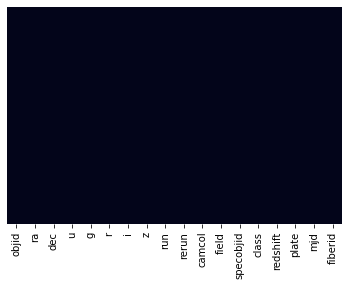

In [7]:
# Checking null values using heatmap for better understanding.
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(sd.isnull(),yticklabels=False,cbar=False)

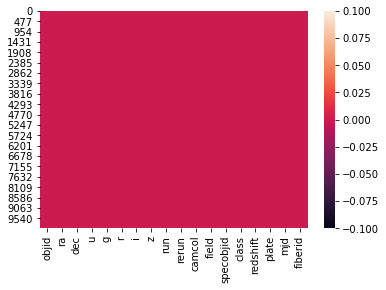

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(sd.isnull())

In [9]:
# Checking dataset shape
sd.shape

(10000, 18)

In [10]:
# Checking dataset information
sd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   objid      10000 non-null  float64
 1   ra         10000 non-null  float64
 2   dec        10000 non-null  float64
 3   u          10000 non-null  float64
 4   g          10000 non-null  float64
 5   r          10000 non-null  float64
 6   i          10000 non-null  float64
 7   z          10000 non-null  float64
 8   run        10000 non-null  int64  
 9   rerun      10000 non-null  int64  
 10  camcol     10000 non-null  int64  
 11  field      10000 non-null  int64  
 12  specobjid  10000 non-null  float64
 13  class      10000 non-null  object 
 14  redshift   10000 non-null  float64
 15  plate      10000 non-null  int64  
 16  mjd        10000 non-null  int64  
 17  fiberid    10000 non-null  int64  
dtypes: float64(10), int64(7), object(1)
memory usage: 1.4+ MB


Observation - There is no null values but class has object data type so will use label encoder to change data type in numeric format. 

In [11]:
sd.isnull().values.any()

False

In [12]:
# Checking unique values in class column
sd['class'].value_counts()

GALAXY    4998
STAR      4152
QSO        850
Name: class, dtype: int64

Observation - The data shows 4998 objects is galaxy, 4152 objects is star and 850 objects is quasar.

In [13]:
# Now changing class columns data into numeric data type for analyzing the data with target.
sd['class']=sd['class'].map({'GALAXY':0,'STAR':1,'QSO':2})
sd['class'].dtypes

dtype('int64')

In [14]:
sd['class'].unique()

array([1, 0, 2], dtype=int64)

Note - 0 stands for galaxy, 1 stands for star and 2 stands for qso

In [15]:
# Checking data type again
sd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   objid      10000 non-null  float64
 1   ra         10000 non-null  float64
 2   dec        10000 non-null  float64
 3   u          10000 non-null  float64
 4   g          10000 non-null  float64
 5   r          10000 non-null  float64
 6   i          10000 non-null  float64
 7   z          10000 non-null  float64
 8   run        10000 non-null  int64  
 9   rerun      10000 non-null  int64  
 10  camcol     10000 non-null  int64  
 11  field      10000 non-null  int64  
 12  specobjid  10000 non-null  float64
 13  class      10000 non-null  int64  
 14  redshift   10000 non-null  float64
 15  plate      10000 non-null  int64  
 16  mjd        10000 non-null  int64  
 17  fiberid    10000 non-null  int64  
dtypes: float64(10), int64(8)
memory usage: 1.4 MB


# Summary Statistics

In [16]:
sd.describe()

objid            ra           dec             u             g  \
count  1.000000e+04  10000.000000  10000.000000  10000.000000  10000.000000   
mean   1.237650e+18    175.529987     14.836148     18.619355     17.371931   
std    1.577039e+05     47.783439     25.212207      0.828656      0.945457   
min    1.237650e+18      8.235100     -5.382632     12.988970     12.799550   
25%    1.237650e+18    157.370946     -0.539035     18.178035     16.815100   
50%    1.237650e+18    180.394514      0.404166     18.853095     17.495135   
75%    1.237650e+18    201.547279     35.649397     19.259232     18.010145   
max    1.237650e+18    260.884382     68.542265     19.599900     19.918970   

                  r             i             z           run    rerun  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.0   
mean      16.840963     16.583579     16.422833    981.034800    301.0   
std        1.067764      1.141805      1.203188    273.305024      0.0   
min       12.431600     11.947210     11.610410    308.000000    301.0   
25%       16.173333     15.853705     15.618285    752.000000    301.0   
50%       16.858770     16.554985     16.389945    756.000000    301.0   
75%       17.512675     17.258550     17.141447   1331.000000    301.0   
max       24.802040     28.179630     22.833060   1412.000000    301.0   

             camcol         field     specobjid         class      redshift  \
count  10000.000000  10000.000000  1.000000e+04  10000.000000  10000.000000   
mean       3.648700    302.380100  1.645022e+18      0.585200      0.143726   
std        1.666183    162.577763  2.013998e+18      0.642481      0.388774   
min        1.000000     11.000000  2.995780e+17      0.000000     -0.004136   
25%        2.000000    184.000000  3.389248e+17      0.000000      0.000081   
50%        4.000000    299.000000  4.966580e+17      1.000000      0.042591   
75%        5.000000    414.000000  2.881300e+18      1.000000      0.092579   
max        6.000000    768.000000  9.468830e+18      2.000000      5.353854   

              plate           mjd       fiberid  
count  10000.000000  10000.000000  10000.000000  
mean    1460.986400  52943.533300    353.069400  
std     1788.778371   1511.150651    206.298149  
min      266.000000  51578.000000      1.000000  
25%      301.000000  51900.000000    186.750000  
50%      441.000000  51997.000000    351.000000  
75%     2559.000000  54468.000000    510.000000  
max     8410.000000  57481.000000   1000.000000

Observation - Difference between 75% and max is higher in dec, i, field, redshift, plate and fiberid.

In [17]:
# Check correlation 
sd_cor=sd.corr()
sd_cor

objid            ra           dec             u  \
objid      1.000000e+00  2.524419e-14 -1.937483e-15  5.581214e-14   
ra         2.524419e-14  1.000000e+00  3.596046e-03  3.123756e-02   
dec       -1.937483e-15  3.596046e-03  1.000000e+00  3.527932e-02   
u          5.581214e-14  3.123756e-02  3.527932e-02  1.000000e+00   
g          1.001149e-13  4.390863e-02  6.187471e-02  8.492320e-01   
r          2.995673e-14  4.710290e-02  6.340395e-02  6.923790e-01   
i          2.212198e-14  4.573107e-02  5.829189e-02  6.026302e-01   
z         -4.107700e-14  4.294957e-02  5.687030e-02  5.514828e-01   
run       -1.553011e-14 -9.274056e-02  7.783849e-01  3.822910e-02   
rerun               NaN           NaN           NaN           NaN   
camcol     1.921887e-15 -6.293831e-03  1.146139e-01  9.944672e-03   
field      5.938881e-16  5.946996e-01 -1.314714e-01  8.547880e-03   
specobjid -1.829075e-15 -9.532711e-02  8.834533e-02 -1.294293e-01   
class     -3.024669e-16 -2.399917e-02  1.451253e-03 -1.220096e-01   
redshift   5.085882e-16  3.030740e-02  6.702076e-02  1.637409e-01   
plate      4.156934e-16 -9.532933e-02  8.834153e-02 -1.294304e-01   
mjd       -3.317582e-15 -8.688726e-02  6.614663e-02 -1.687927e-01   
fiberid    4.665195e-15  5.748482e-02  1.550124e-01  1.130112e-02   

                      g             r             i             z  \
objid      1.001149e-13  2.995673e-14  2.212198e-14 -4.107700e-14   
ra         4.390863e-02  4.710290e-02  4.573107e-02  4.294957e-02   
dec        6.187471e-02  6.340395e-02  5.829189e-02  5.687030e-02   
u          8.492320e-01  6.923790e-01  6.026302e-01  5.514828e-01   
g          1.000000e+00  9.581062e-01  9.074187e-01  8.796222e-01   
r          9.581062e-01  1.000000e+00  9.776718e-01  9.691967e-01   
i          9.074187e-01  9.776718e-01  1.000000e+00  9.815066e-01   
z          8.796222e-01  9.691967e-01  9.815066e-01  1.000000e+00   
run        5.844630e-02  5.726060e-02  4.976478e-02  4.825225e-02   
rerun               NaN           NaN           NaN           NaN   
camcol     1.022304e-02  1.074725e-02  1.346079e-02  1.092981e-02   
field      1.465110e-02  1.713294e-02  1.978147e-02  1.824845e-02   
specobjid -5.497908e-02  1.978831e-02  7.295994e-02  1.123981e-01   
class      2.007484e-01  3.448998e-01  4.176314e-01  4.654747e-01   
redshift   4.075763e-01  4.410797e-01  4.314500e-01  4.240342e-01   
plate     -5.498078e-02  1.978671e-02  7.295843e-02  1.123969e-01   
mjd       -9.277155e-02 -9.344506e-03  5.089616e-02  9.565845e-02   
fiberid    4.718739e-02  6.108141e-02  6.997739e-02  6.797999e-02   

                    run  rerun        camcol         field     specobjid  \
objid     -1.553011e-14    NaN  1.921887e-15  5.938881e-16 -1.829075e-15   
ra        -9.274056e-02    NaN -6.293831e-03  5.946996e-01 -9.532711e-02   
dec        7.783849e-01    NaN  1.146139e-01 -1.314714e-01  8.834533e-02   
u          3.822910e-02    NaN  9.944672e-03  8.547880e-03 -1.294293e-01   
g          5.844630e-02    NaN  1.022304e-02  1.465110e-02 -5.497908e-02   
r          5.726060e-02    NaN  1.074725e-02  1.713294e-02  1.978831e-02   
i          4.976478e-02    NaN  1.346079e-02  1.978147e-02  7.295994e-02   
z          4.825225e-02    NaN  1.092981e-02  1.824845e-02  1.123981e-01   
run        1.000000e+00    NaN  1.518143e-01 -4.638975e-01  9.360436e-02   
rerun               NaN    NaN           NaN           NaN           NaN   
camcol     1.518143e-01    NaN  1.000000e+00 -6.792055e-02  4.080943e-02   
field     -4.638975e-01    NaN -6.792055e-02  1.000000e+00 -9.372375e-02   
specobjid  9.360436e-02    NaN  4.080943e-02 -9.372375e-02  1.000000e+00   
class     -1.795842e-02    NaN  8.228446e-04  8.897369e-03  4.146768e-01   
redshift   5.905595e-02    NaN  6.833537e-03  1.541360e-02 -3.808992e-02   
plate      9.360107e-02    NaN  4.079461e-02 -9.372323e-02  1.000000e+00   
mjd        7.035433e-02    NaN  2.628396e-02 -8.655805e-02  9.668799e-01   
fiberid    1.385659e-01   

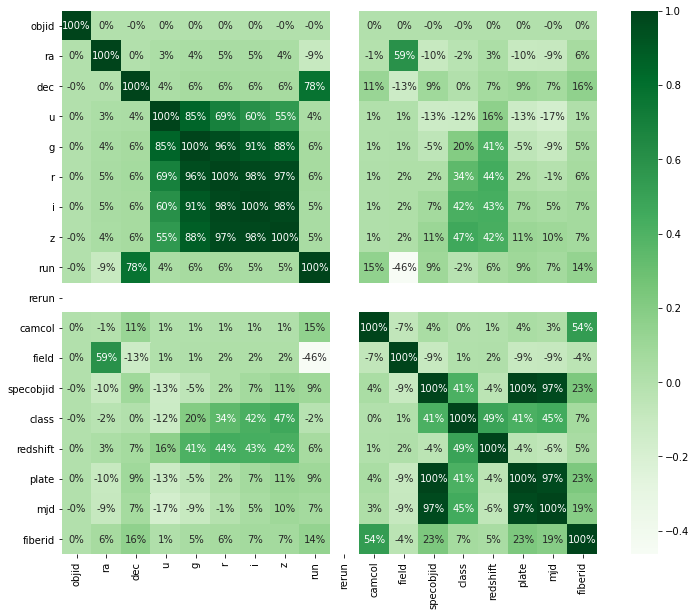

In [18]:
plt.figure(figsize=(12,10))
sns.heatmap(sd_cor,annot=True,fmt='.0%',cmap='Greens')
plt.show()

Observation - Above grap shows I and r, z and i, z and r, plate and mjd, plate and specojid, mjd and specojid, i and r, i and g, r and g are highly correlation values. 

r,i,z,cpecojid,redshilf,plate and mjd are little high correlation with target variable. 

In [19]:
sd['rerun'].value_counts()

301    10000
Name: rerun, dtype: int64

Text(0.5, 1.0, 'Correlation with target Variable')

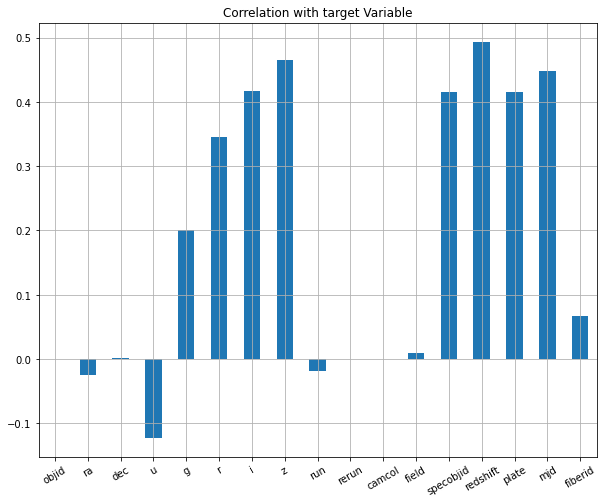

In [20]:
# exploring data with target variable using graph
plt.figure(figsize=(10,8))
sd.drop('class',axis=1).corrwith(sd['class']).plot(kind='bar',grid=True)
plt.xticks(rotation=30)
plt.title('Correlation with target Variable')

Observation - Above graphy show redshift is highly correlated with target variable more than others input variable. 

U, ra and run is negatively correlated with target target variable. 

# Univariate Analysis

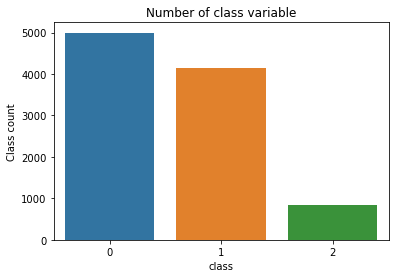

0    4998
1    4152
2     850
Name: class, dtype: int64


In [21]:
# Checking total number of class variable
plt.subplots(figsize=(6,4))
sns.countplot(x='class',data=sd)
plt.title('Number of class variable')
plt.xlabel('class')
plt.ylabel('Class count')
plt.show()

print(sd['class'].value_counts())

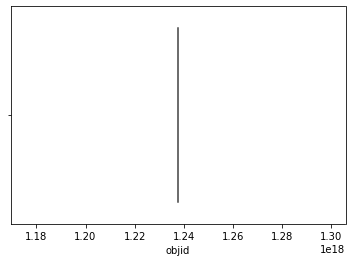

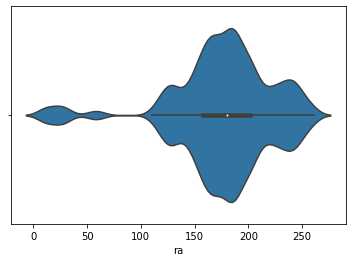

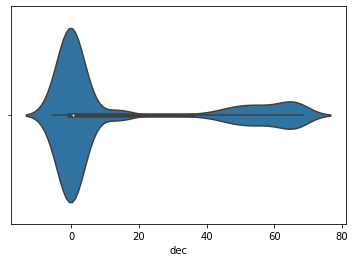

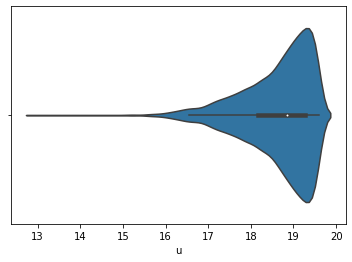

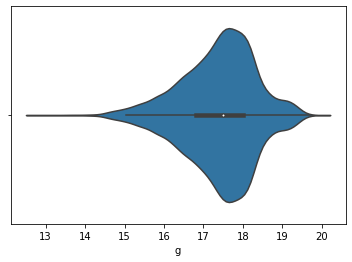

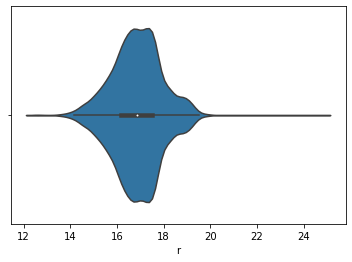

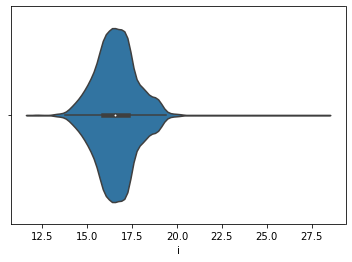

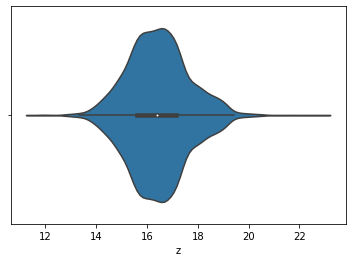

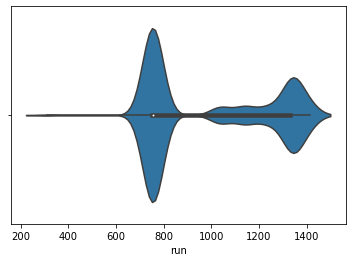

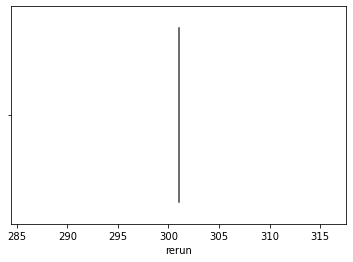

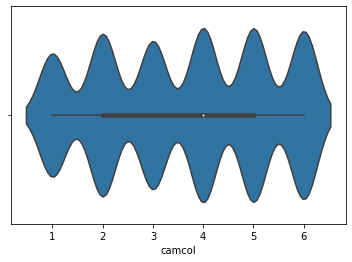

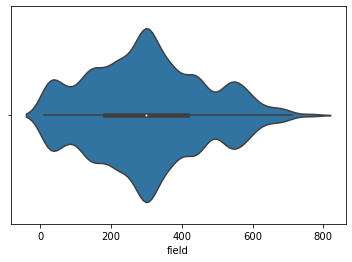

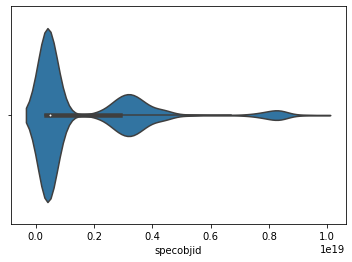

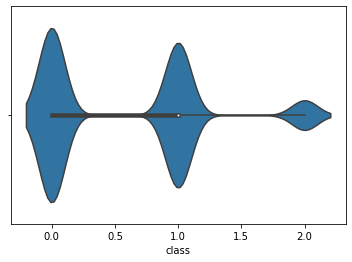

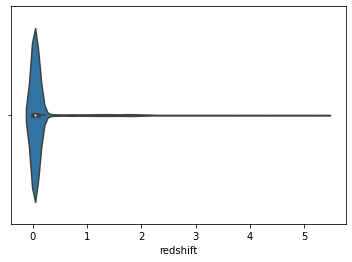

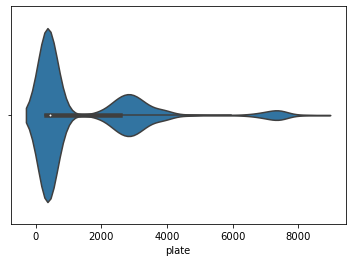

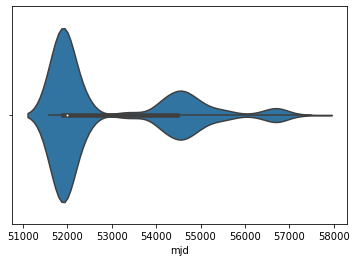

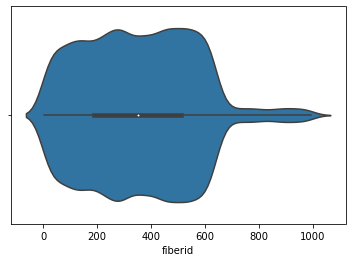

In [22]:
# Checking distribution of all variable using violinplot

for i in sd.columns:
    sns.violinplot(sd[i])
    plt.show()

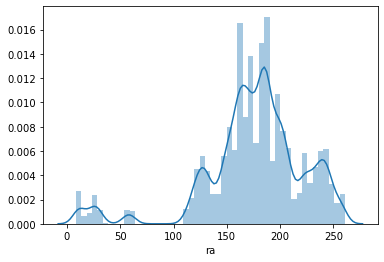

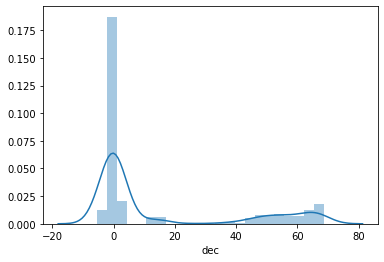

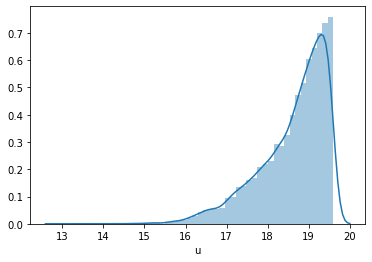

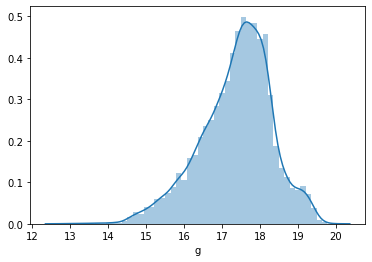

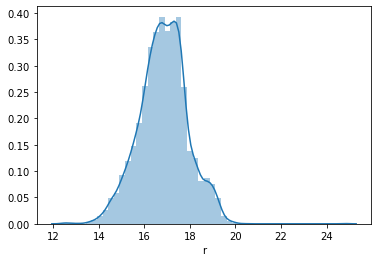

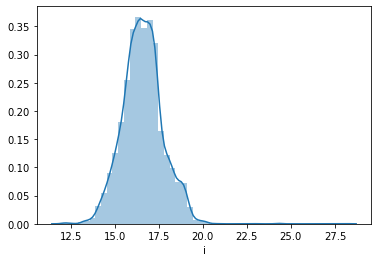

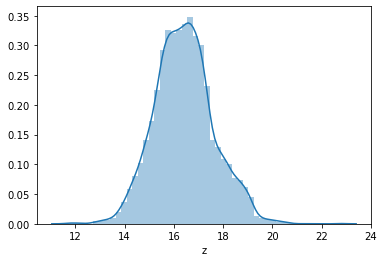

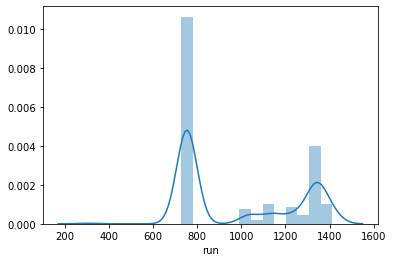

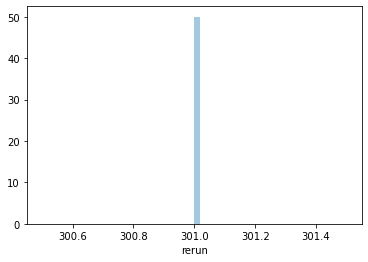

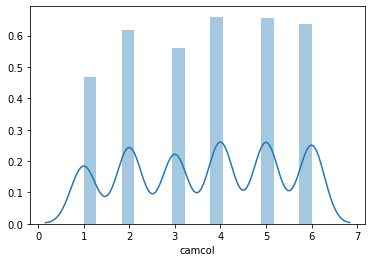

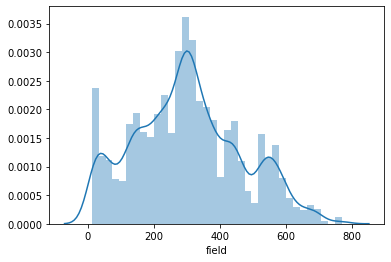

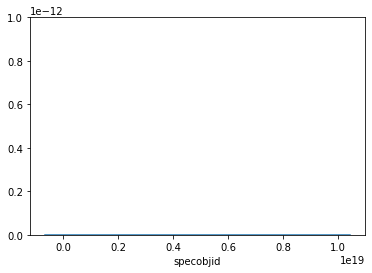

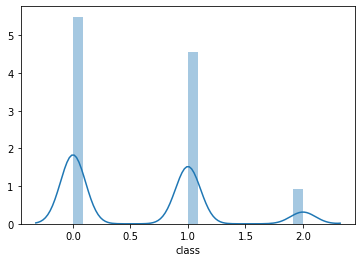

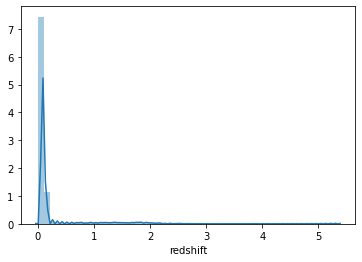

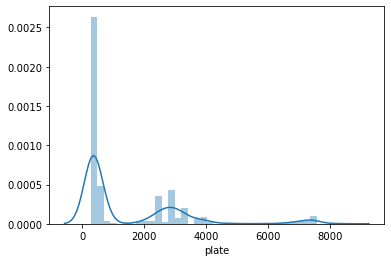

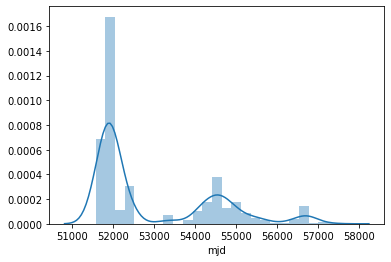

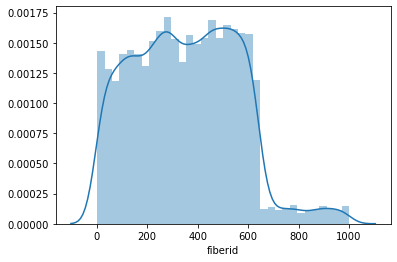

In [23]:
# Checking distribution of all variable using distplot
distplot=pd.DataFrame(sd.drop(columns=['objid']))

for i in distplot.columns:
    sns.distplot(distplot[i])
    plt.show()


# Bivariate Analysis

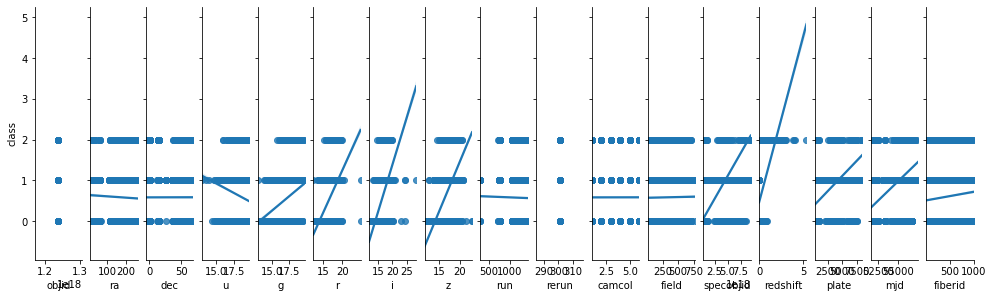

In [24]:
# Checking relationship between input variable and target using scatter plot and pair plot
sns.pairplot(sd, x_vars=['objid', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'rerun', 'camcol','field', 'specobjid', 'redshift', 'plate', 'mjd', 'fiberid'], y_vars='class', size=4, aspect=0.2, kind='reg')

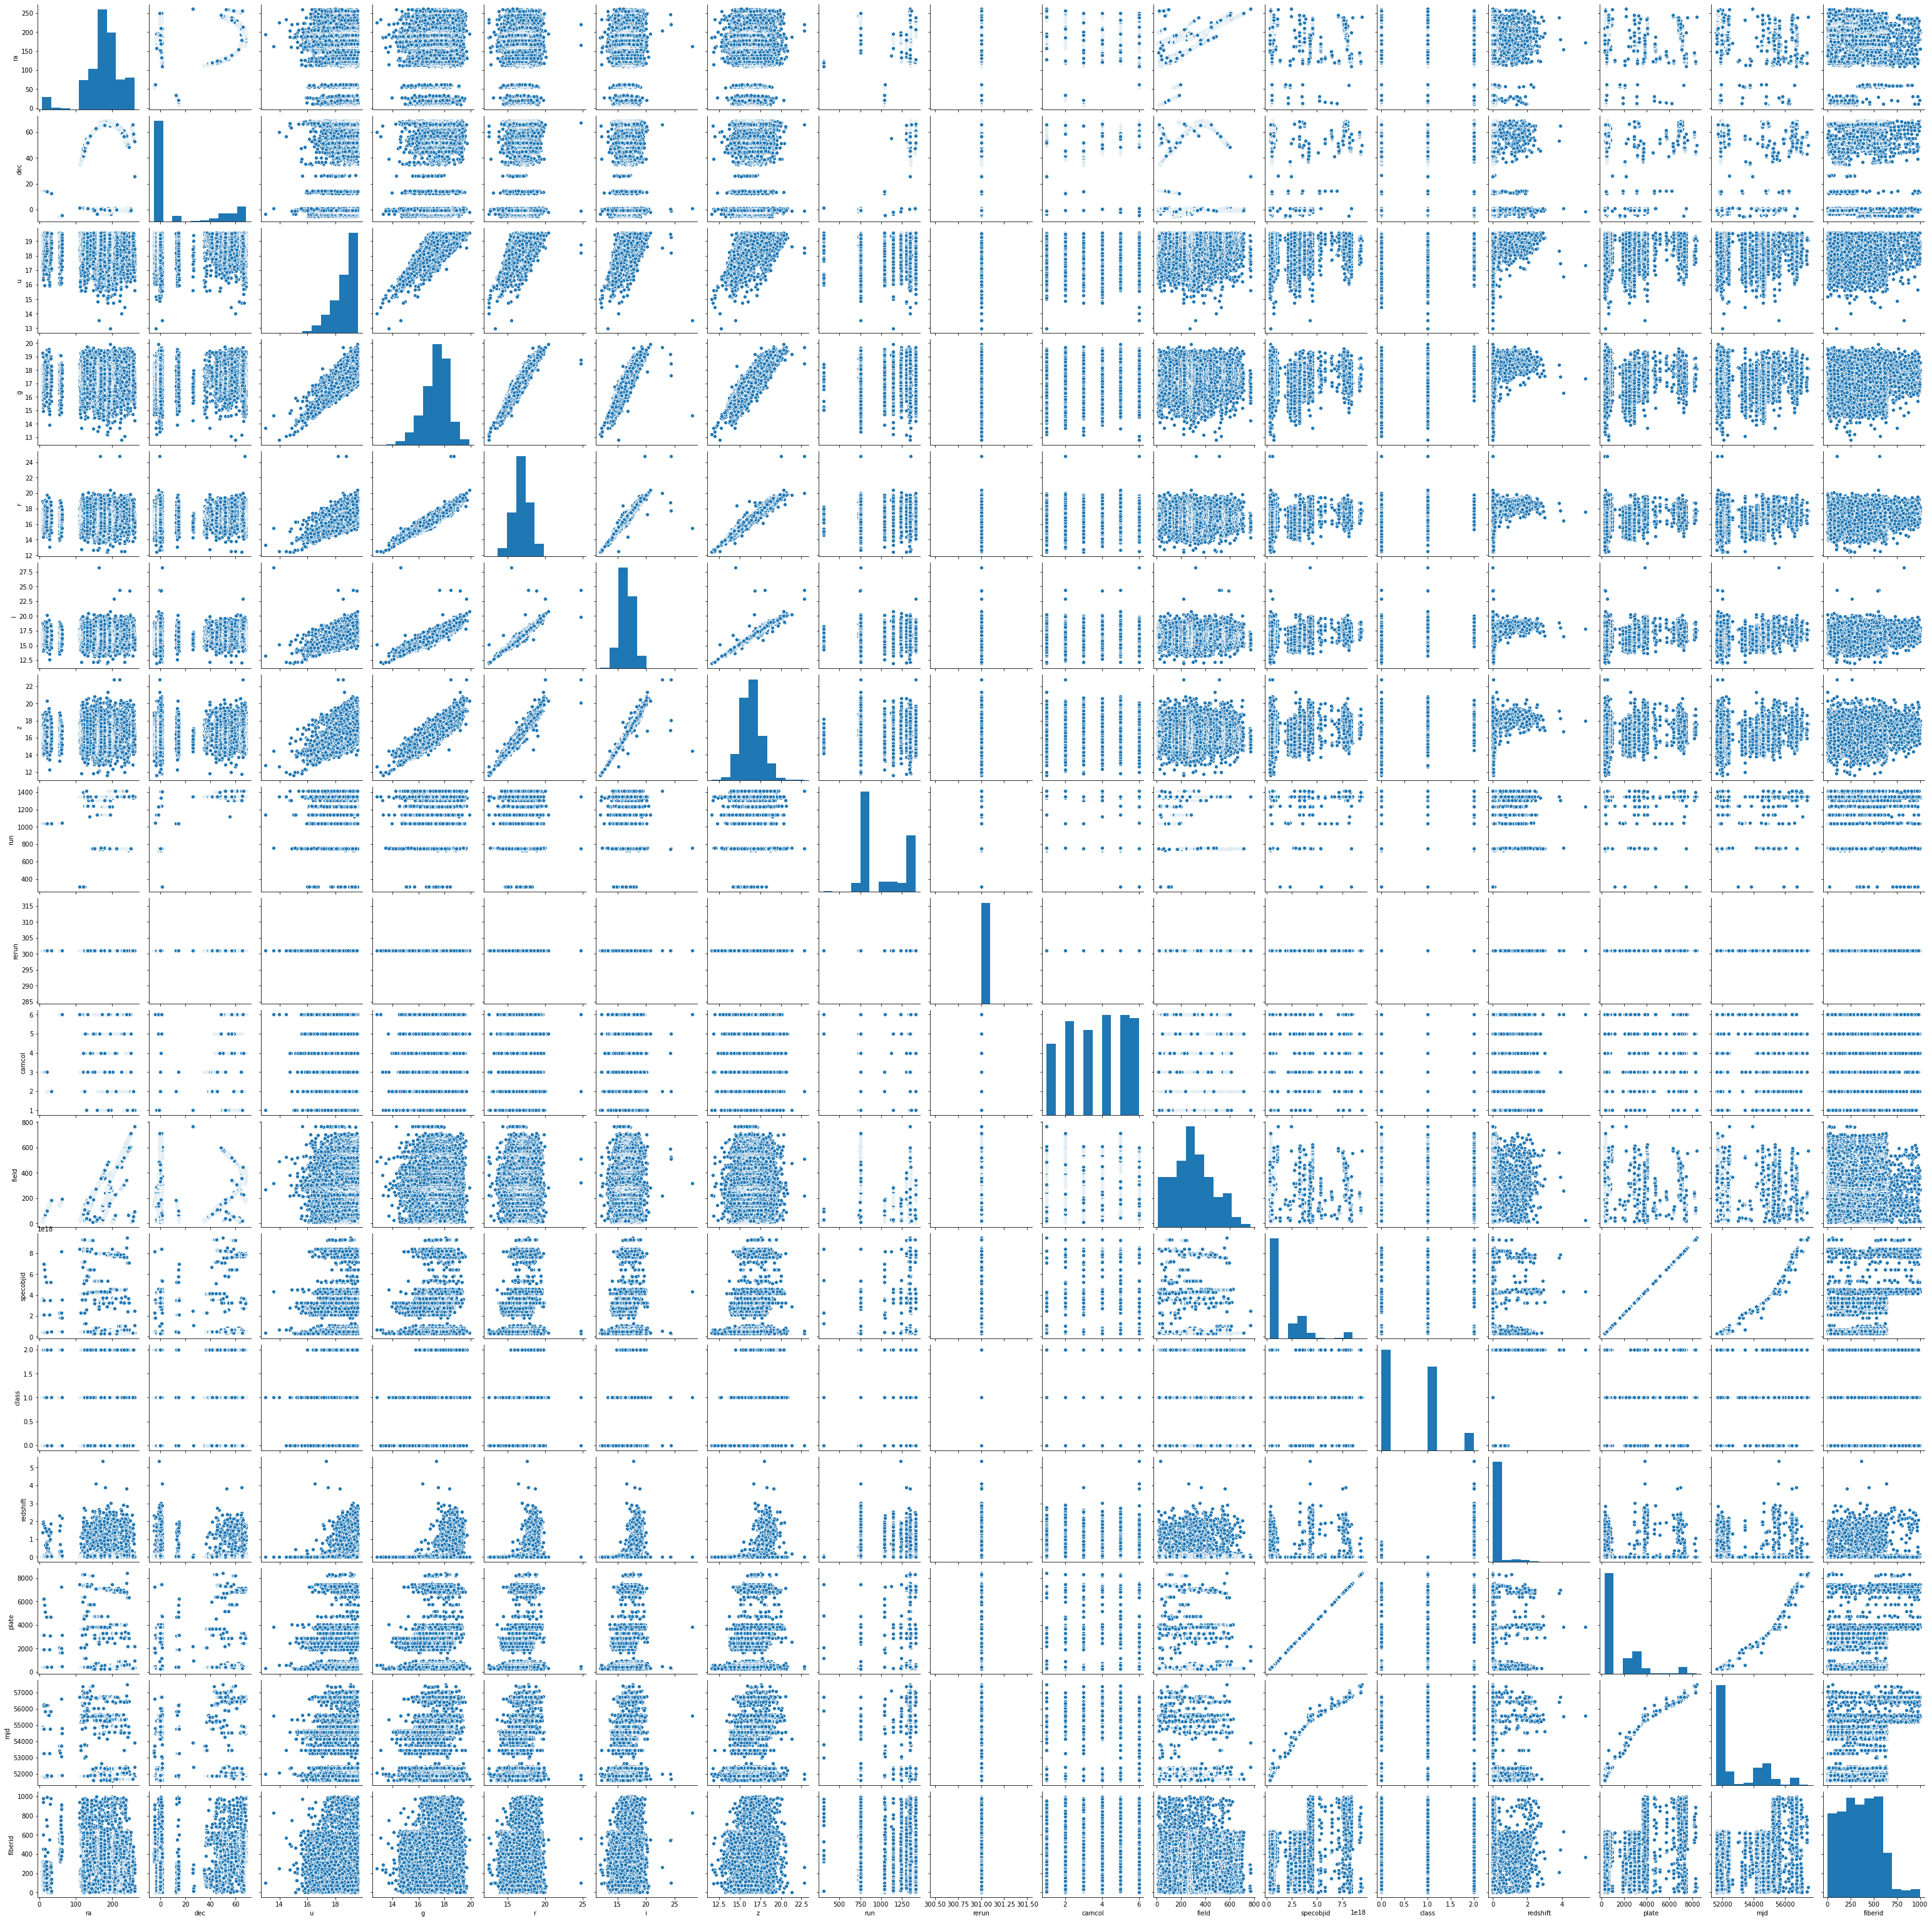

In [25]:
sns.pairplot(distplot)

# Plotting outliers

In [26]:
sd.columns

Index(['objid', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'rerun', 'camcol',
       'field', 'specobjid', 'class', 'redshift', 'plate', 'mjd', 'fiberid'],
      dtype='object')

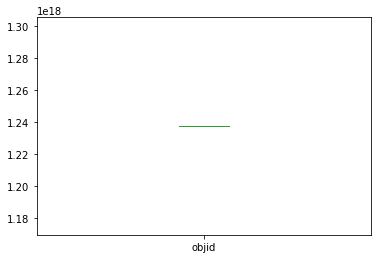

In [27]:
sd['objid'].plot.box()

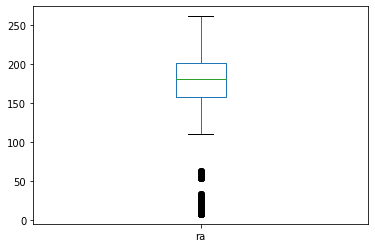

In [28]:
sd['ra'].plot.box()

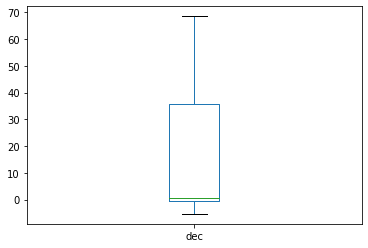

In [29]:
sd['dec'].plot.box()

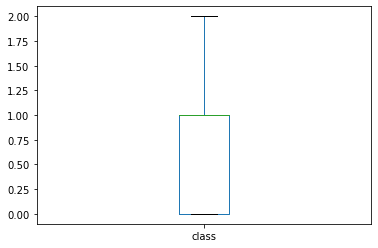

In [30]:
sd['class'].plot.box()

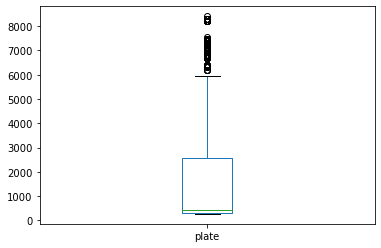

In [31]:
sd['plate'].plot.box()

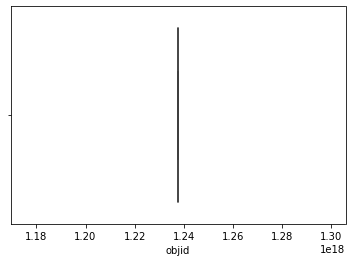

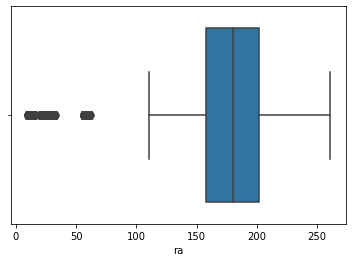

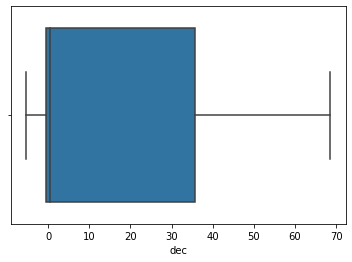

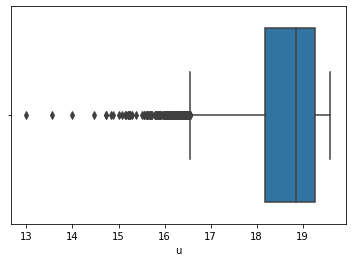

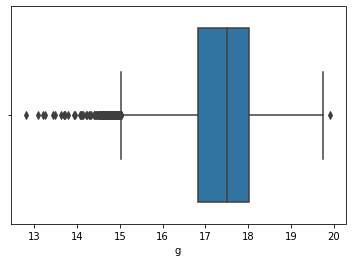

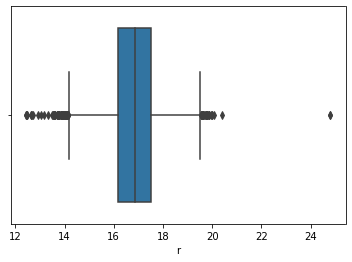

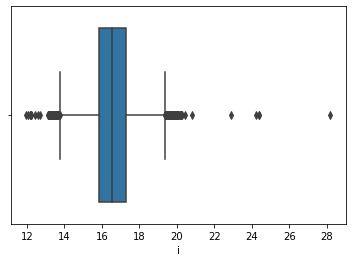

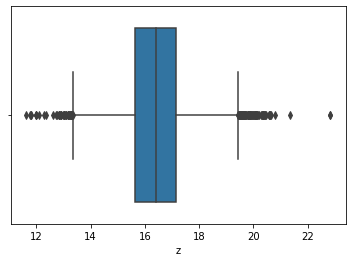

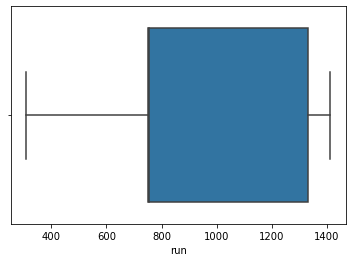

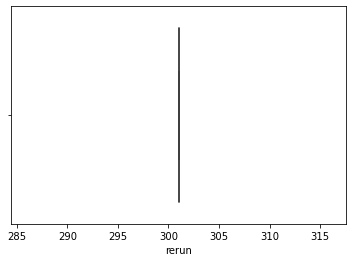

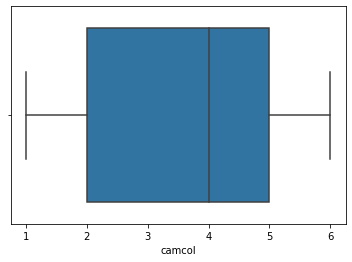

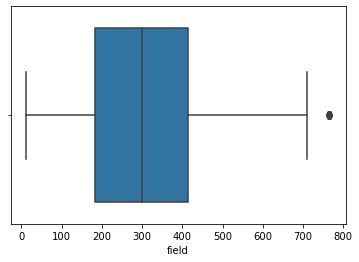

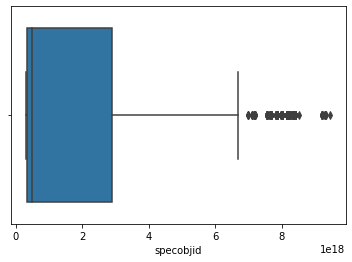

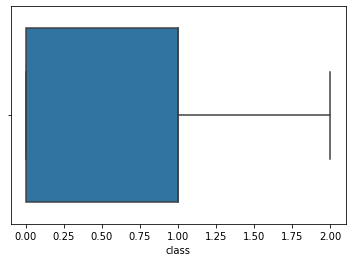

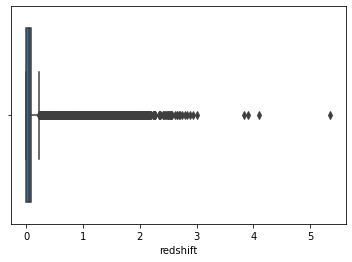

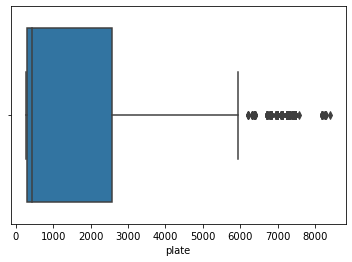

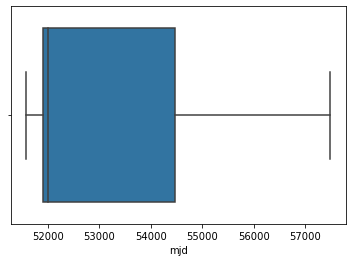

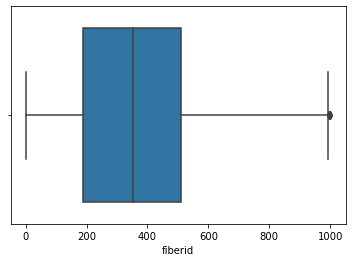

In [32]:
for i in sd.columns:
    sns.boxplot(sd[i])
    plt.show()

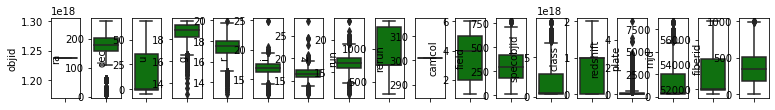

In [33]:
collist=sd.columns.values
ncol=20
nrow=15

plt.figure(figsize=(12,20))
for i in range(0,len(collist)):
    plt.subplot(nrow,ncol,i+1)
    sns.boxplot(sd[collist[i]],color='green',orient='v')
    plt.tight_layout()

Observation - Above Graph shows outliers present in most of columns except class column.

In [34]:
# Removing objid and rerun columns as these two columns have same values in all rows.
sd1=sd.drop(columns=['objid','rerun'])

In [35]:
sd1

ra        dec         u         g         r         i         z  \
0     183.531326   0.089693  19.47406  17.04240  15.94699  15.50342  15.22531   
1     183.598371   0.135285  18.66280  17.21449  16.67637  16.48922  16.39150   
2     183.680207   0.126185  19.38298  18.19169  17.47428  17.08732  16.80125   
3     183.870529   0.049911  17.76536  16.60272  16.16116  15.98233  15.90438   
4     183.883288   0.102557  17.55025  16.26342  16.43869  16.55492  16.61326   
...          ...        ...       ...       ...       ...       ...       ...   
9995  131.316413  51.539547  18.81777  17.47053  16.91508  16.68305  16.50570   
9996  131.306083  51.671341  18.27255  17.43849  17.07692  16.71661  16.69897   
9997  131.552562  51.666986  18.75818  17.77784  17.51872  17.43302  17.42048   
9998  131.477151  51.753068  18.88287  17.91068  17.53152  17.36284  17.13988   
9999  131.665012  51.805307  19.27586  17.37829  16.30542  15.83548  15.50588   

       run  camcol  field     specobjid  class  redshift  plate    mjd  \
0      752       4    267  3.722360e+18      1 -0.000009   3306  54922   
1      752       4    267  3.638140e+17      1 -0.000055    323  51615   
2      752       4    268  3.232740e+17      0  0.123111    287  52023   
3      752       4    269  3.722370e+18      1 -0.000111   3306  54922   
4      752       4    269  3.722370e+18      1  0.000590   3306  54922   
...    ...     ...    ...           ...    ...       ...    ...    ...   
9995  1345       3    161  5.033450e+17      0  0.027583    447  51877   
9996  1345       3    162  5.033400e+17      0  0.117772    447  51877   
9997  1345       3    162  8.222620e+18      1 -0.000402   7303  57013   
9998  1345       3    163  5.033400e+17      0  0.014019    447  51877   
9999  1345       3    163  5.033410e+17      0  0.118417    447  51877   

      fiberid  
0         491  
1         541  
2         513  
3         510  
4         512  
...       ...  
9995      246  
9996      228  
9997      622  
9998      229  
9999      233  

[10000 rows x 16 columns]

In [36]:
sd=pd.DataFrame(data=sd1)

# Removing Outliers¶

In [37]:
from scipy.stats import zscore
z=np.abs(zscore(sd))
z

array([[0.16745842, 0.58492272, 1.03148637, ..., 1.03148936, 1.30931064,
        0.66863177],
       [0.16886159, 0.58311429, 0.05243046, ..., 0.63621258, 0.87919741,
        0.91101156],
       [0.17057433, 0.58347525, 0.92156796, ..., 0.65633905, 0.60919097,
        0.77527888],
       ...,
       [0.92039468, 1.46090664, 0.16753826, ..., 3.26608697, 2.69309363,
        1.3036668 ],
       [0.92197294, 1.46432109, 0.31801835, ..., 0.56688806, 0.70581092,
        0.60143828],
       [0.91804124, 1.46639319, 0.79229193, ..., 0.56688806, 0.70581092,
        0.5820479 ]])

In [38]:
threshold=3
print(np.where(z>3))

(array([  45,  109,  129, ..., 9994, 9997, 9997], dtype=int64), array([12, 12, 12, ..., 13, 10, 13], dtype=int64))


In [39]:
sd_new=sd[(z<3).all(axis=1)]

In [40]:
print(sd.shape)

(10000, 16)


In [41]:
print(sd_new.shape)

(8698, 16)


In [42]:
sd_new.isnull().sum()

ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          0
camcol       0
field        0
specobjid    0
class        0
redshift     0
plate        0
mjd          0
fiberid      0
dtype: int64

In [43]:
sd_new

ra        dec         u         g         r         i         z  \
0     183.531326   0.089693  19.47406  17.04240  15.94699  15.50342  15.22531   
1     183.598371   0.135285  18.66280  17.21449  16.67637  16.48922  16.39150   
2     183.680207   0.126185  19.38298  18.19169  17.47428  17.08732  16.80125   
3     183.870529   0.049911  17.76536  16.60272  16.16116  15.98233  15.90438   
4     183.883288   0.102557  17.55025  16.26342  16.43869  16.55492  16.61326   
...          ...        ...       ...       ...       ...       ...       ...   
9993  131.398915  51.533706  17.79613  16.02621  15.15955  14.71488  14.33840   
9995  131.316413  51.539547  18.81777  17.47053  16.91508  16.68305  16.50570   
9996  131.306083  51.671341  18.27255  17.43849  17.07692  16.71661  16.69897   
9998  131.477151  51.753068  18.88287  17.91068  17.53152  17.36284  17.13988   
9999  131.665012  51.805307  19.27586  17.37829  16.30542  15.83548  15.50588   

       run  camcol  field     specobjid  class  redshift  plate    mjd  \
0      752       4    267  3.722360e+18      1 -0.000009   3306  54922   
1      752       4    267  3.638140e+17      1 -0.000055    323  51615   
2      752       4    268  3.232740e+17      0  0.123111    287  52023   
3      752       4    269  3.722370e+18      1 -0.000111   3306  54922   
4      752       4    269  3.722370e+18      1  0.000590   3306  54922   
...    ...     ...    ...           ...    ...       ...    ...    ...   
9993  1345       3    161  5.033460e+17      0  0.055515    447  51877   
9995  1345       3    161  5.033450e+17      0  0.027583    447  51877   
9996  1345       3    162  5.033400e+17      0  0.117772    447  51877   
9998  1345       3    163  5.033400e+17      0  0.014019    447  51877   
9999  1345       3    163  5.033410e+17      0  0.118417    447  51877   

      fiberid  
0         491  
1         541  
2         513  
3         510  
4         512  
...       ...  
9993      249  
9995      246  
9996      228  
9998      229  
9999      233  

[8698 rows x 16 columns]

Observation - Now 1302 rows removed from dataset due to outliers are present. 

In [44]:
# Separating data into input and output variables.
sd_x=sd_new.drop(columns=['class'])
y=pd.DataFrame(sd_new['class'])

# check the distribution of Skewnewss

In [45]:
#Checking skewnewss
sd_x.skew()

ra          -0.130951
dec          1.212911
u           -0.981103
g           -0.528033
r           -0.153454
i            0.055966
z            0.167256
run          0.518602
camcol      -0.141193
field        0.220032
specobjid    1.320102
redshift     4.951700
plate        1.320088
mjd          0.963989
fiberid      0.065374
dtype: float64

In [46]:
# Treating skewness via log method

for col in sd_x.columns:
    if sd_x[col].skew()>0.55:
        sd_x[col]=np.log1p(sd_x[col])

In [47]:
sd_x.skew()

ra          -0.130951
dec          0.255429
u           -0.981103
g           -0.528033
r           -0.153454
i            0.055966
z            0.167256
run          0.518602
camcol      -0.141193
field        0.220032
specobjid    0.751620
redshift     4.195758
plate        0.752026
mjd          0.949578
fiberid      0.065374
dtype: float64

In [48]:
sd_x.isnull().sum()

ra              0
dec          1069
u               0
g               0
r               0
i               0
z               0
run             0
camcol          0
field           0
specobjid       0
redshift        0
plate           0
mjd             0
fiberid         0
dtype: int64

In [49]:
# filling null value data with mean.

for col in ['dec']:
    sd_x[col].fillna(sd_x[col].mean(),inplace=True)

In [50]:
sd_x.isnull().sum()

ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          0
camcol       0
field        0
specobjid    0
redshift     0
plate        0
mjd          0
fiberid      0
dtype: int64

In [51]:
# Scaling the input Variable

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(sd_x)
x=pd.DataFrame(x,columns=sd_x.columns)

In [52]:
x

ra       dec         u         g         r         i         z  \
0     0.022563 -0.466008  1.076410 -0.332856 -0.855097 -0.969819 -1.007660   
1     0.024421 -0.445524  0.039766 -0.134171 -0.098144 -0.009474  0.055512   
2     0.026689 -0.449546  0.960026  0.994046  0.729930  0.573183  0.429065   
3     0.031964 -0.484595 -1.107002 -0.840484 -0.632831 -0.503275 -0.388577   
4     0.032318 -0.460143 -1.381874 -1.232219 -0.344809  0.054530  0.257682   
...        ...       ...       ...       ...       ...       ...       ...   
8693 -1.422261  1.470891 -1.067683 -1.506087 -1.672305 -1.737999 -1.816223   
8694 -1.424548  1.470947  0.237789  0.161438  0.149590  0.179351  0.159624   
8695 -1.424834  1.472199 -0.458904  0.124446  0.317548  0.212045  0.335821   
8696 -1.420093  1.472974  0.320976  0.669608  0.789334  0.841588  0.737782   
8697 -1.414887  1.473468  0.823146  0.054943 -0.483117 -0.646334 -0.751875   

           run    camcol     field  specobjid  redshift     plate       mjd  \
0    -0.790307  0.197332 -0.304679   1.573357 -0.553789  1.573507  1.665137   
1    -0.790307  0.197332 -0.304679  -0.731864 -0.554174 -0.731988 -0.891468   
2    -0.790307  0.197332 -0.298398  -0.848978  0.418754 -0.848881 -0.567327   
3    -0.790307  0.197332 -0.292117   1.573359 -0.554640  1.573507  1.665137   
4    -0.790307  0.197332 -0.292117   1.573359 -0.548770  1.573507  1.665137   
...        ...       ...       ...        ...       ...       ...       ...   
8693  1.360326 -0.394324 -0.970460  -0.410056 -0.101172 -0.410388 -0.683025   
8694  1.360326 -0.394324 -0.970460  -0.410058 -0.325810 -0.410388 -0.683025   
8695  1.360326 -0.394324 -0.964179  -0.410068  0.378842 -0.410388 -0.683025   
8696  1.360326 -0.394324 -0.957898  -0.410068 -0.437108 -0.410388 -0.683025   
8697  1.360326 -0.394324 -0.957898  -0.410066  0.383675 -0.410388 -0.683025   

       fiberid  
0     0.754994  
1     1.016814  
2     0.870195  
3     0.854486  
4     0.864958  
...        ...  
8693 -0.512213  
8694 -0.527922  
8695 -0.622177  
8696 -0.616941  
8697 -0.595995  

[8698 rows x 15 columns]

In [53]:
x.isnull().sum()

ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          0
camcol       0
field        0
specobjid    0
redshift     0
plate        0
mjd          0
fiberid      0
dtype: int64

In [54]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8698 entries, 0 to 8697
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ra         8698 non-null   float64
 1   dec        8698 non-null   float64
 2   u          8698 non-null   float64
 3   g          8698 non-null   float64
 4   r          8698 non-null   float64
 5   i          8698 non-null   float64
 6   z          8698 non-null   float64
 7   run        8698 non-null   float64
 8   camcol     8698 non-null   float64
 9   field      8698 non-null   float64
 10  specobjid  8698 non-null   float64
 11  redshift   8698 non-null   float64
 12  plate      8698 non-null   float64
 13  mjd        8698 non-null   float64
 14  fiberid    8698 non-null   float64
dtypes: float64(15)
memory usage: 1019.4 KB


# Model Training

In [55]:
# Make input and output variables into train and test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.20)

In [56]:
import sklearn
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

model=[GaussianNB(),SVC(),DecisionTreeClassifier(),KNeighborsClassifier(),]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('Accuracy score of',m, 'is:')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n')

Accuracy score of GaussianNB() is:
0.9155172413793103
[[916   3  35]
 [ 81 613  20]
 [  8   0  64]]
              precision    recall  f1-score   support

           0       0.91      0.96      0.94       954
           1       1.00      0.86      0.92       714
           2       0.54      0.89      0.67        72

    accuracy                           0.92      1740
   macro avg       0.81      0.90      0.84      1740
weighted avg       0.93      0.92      0.92      1740



Accuracy score of SVC() is:
0.9747126436781609
[[926  24   4]
 [  5 709   0]
 [ 11   0  61]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       954
           1       0.97      0.99      0.98       714
           2       0.94      0.85      0.89        72

    accuracy                           0.97      1740
   macro avg       0.96      0.94      0.95      1740
weighted avg       0.97      0.97      0.97      1740



Accuracy score of DecisionTreeClassifier(

In [57]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(n_estimators=100,random_state=42,criterion='entropy')
#RandomForestClassifier(100)---Default
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.9879310344827587
[[944   5   5]
 [  0 714   0]
 [ 11   0  61]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       954
           1       0.99      1.00      1.00       714
           2       0.92      0.85      0.88        72

    accuracy                           0.99      1740
   macro avg       0.97      0.95      0.96      1740
weighted avg       0.99      0.99      0.99      1740



In [58]:
# Finding out best paramter using GridsearchCV
dtc=DecisionTreeClassifier()
from sklearn.model_selection import GridSearchCV
parameters={'criterion':['gini', 'entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}
gs=GridSearchCV(dtc,parameters)
gs.fit(x,y)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 20, 30,
                                       40, 50, 70, 90, 120, 150]})

In [59]:
print(gs.best_params_)

{'criterion': 'entropy', 'max_depth': 4}


In [60]:
#Using DecisionTreeClassifier() model with best results
dtc=DecisionTreeClassifier(criterion='entropy',max_depth=4)
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc=dtc.predict(x_test)
print('Accuracy score of',dtc, 'is:')
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))
print('\n')

Accuracy score of DecisionTreeClassifier(criterion='entropy', max_depth=4) is:
0.9896551724137931
[[945   2   7]
 [  0 714   0]
 [  9   0  63]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       954
           1       1.00      1.00      1.00       714
           2       0.90      0.88      0.89        72

    accuracy                           0.99      1740
   macro avg       0.96      0.96      0.96      1740
weighted avg       0.99      0.99      0.99      1740





# Using Ensemble Technique to boostup score

In [61]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(n_estimators=100,random_state=42,criterion='entropy')
#RandomForestClassifier(100)---Default
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.9879310344827587
[[944   5   5]
 [  0 714   0]
 [ 11   0  61]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       954
           1       0.99      1.00      1.00       714
           2       0.92      0.85      0.88        72

    accuracy                           0.99      1740
   macro avg       0.97      0.95      0.96      1740
weighted avg       0.99      0.99      0.99      1740



In [62]:
from sklearn.ensemble import AdaBoostClassifier

ad=AdaBoostClassifier(n_estimators=100,random_state=42,base_estimator=dtc,algorithm='SAMME',learning_rate=0.01)
ad.fit(x_train,y_train)
ad_pred=ad.predict(x_test)
print(accuracy_score(y_test,ad_pred))
print(confusion_matrix(y_test,ad_pred))
print(classification_report(y_test,ad_pred))

0.9896551724137931
[[946   2   6]
 [  0 714   0]
 [ 10   0  62]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       954
           1       1.00      1.00      1.00       714
           2       0.91      0.86      0.89        72

    accuracy                           0.99      1740
   macro avg       0.97      0.95      0.96      1740
weighted avg       0.99      0.99      0.99      1740



In [63]:
ad=AdaBoostClassifier(n_estimators=50)
ad.fit(x_train,y_train)
ad_pred=ad.predict(x_test)
print(accuracy_score(y_test,ad_pred))
print(confusion_matrix(y_test,ad_pred))
print(classification_report(y_test,ad_pred))

0.8229885057471265
[[801   2 151]
 [101 613   0]
 [ 54   0  18]]
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       954
           1       1.00      0.86      0.92       714
           2       0.11      0.25      0.15        72

    accuracy                           0.82      1740
   macro avg       0.65      0.65      0.64      1740
weighted avg       0.87      0.82      0.84      1740



In [64]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()

gb.fit(x_train,y_train)

gba=gb.predict(x_test)
print(accuracy_score(y_test,gba))
print(confusion_matrix(y_test,gba))
print(classification_report(y_test,gba))

0.9885057471264368
[[945   2   7]
 [  0 713   1]
 [ 10   0  62]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       954
           1       1.00      1.00      1.00       714
           2       0.89      0.86      0.87        72

    accuracy                           0.99      1740
   macro avg       0.96      0.95      0.95      1740
weighted avg       0.99      0.99      0.99      1740



In [65]:
# Finding out best paramter using GridsearchCV
from sklearn.model_selection import GridSearchCV
parameters={'random_state':range(35,100)}
gc=GridSearchCV(dtc,parameters)
gc.fit(x,y)
gc.best_params_

{'random_state': 39}

In [66]:
from sklearn.ensemble import AdaBoostClassifier

ad=AdaBoostClassifier(n_estimators=100,random_state=39,base_estimator=dtc,algorithm='SAMME',learning_rate=0.01)

ad.fit(x_train,y_train)
ad_pred=ad.predict(x_test)
print(accuracy_score(y_test,ad_pred))
print(confusion_matrix(y_test,ad_pred))
print(classification_report(y_test,ad_pred))

0.9896551724137931
[[946   2   6]
 [  0 714   0]
 [ 10   0  62]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       954
           1       1.00      1.00      1.00       714
           2       0.91      0.86      0.89        72

    accuracy                           0.99      1740
   macro avg       0.97      0.95      0.96      1740
weighted avg       0.99      0.99      0.99      1740



In [67]:
# Cross validate of AdaBoostClassifier
from sklearn.model_selection import cross_val_score
score=cross_val_score(ad,x,y,cv=10,scoring='accuracy')
print('Score:', score)
print('Mean Score:', score.std())
print('Standard Deviation:', score.std())

Score: [0.98850575 0.99655172 0.99195402 0.98850575 0.99195402 0.98850575
 0.9862069  0.98275862 0.99309551 0.98619102]
Mean Score: 0.0038058534753782347
Standard Deviation: 0.0038058534753782347


In [68]:
from sklearn.ensemble import AdaBoostClassifier

ad=AdaBoostClassifier(n_estimators=100,random_state=39,base_estimator=dtc,algorithm='SAMME',learning_rate=0.01)

ad.fit(x_train,y_train)
ad_pred=ad.predict(x_test)
print(accuracy_score(y_test,ad_pred))
print(confusion_matrix(y_test,ad_pred))
print(classification_report(y_test,ad_pred))

0.9896551724137931
[[946   2   6]
 [  0 714   0]
 [ 10   0  62]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       954
           1       1.00      1.00      1.00       714
           2       0.91      0.86      0.89        72

    accuracy                           0.99      1740
   macro avg       0.97      0.95      0.96      1740
weighted avg       0.99      0.99      0.99      1740



In [69]:
# Cross validate of AdaBoostClassifier
from sklearn.model_selection import cross_val_score
score=cross_val_score(ad,x,y,cv=10,scoring='accuracy')
print('Score:', score)
print('Mean Score:', score.std())
print('Standard Deviation:', score.std())

Score: [0.98850575 0.99655172 0.99195402 0.98850575 0.99195402 0.98850575
 0.9862069  0.98275862 0.99309551 0.98619102]
Mean Score: 0.0038058534753782347
Standard Deviation: 0.0038058534753782347


In [70]:
# Saving the AdaBoostClassifier
import joblib
joblib.dump(ad,'Space Server Dataset evaluation.pkl')

['Space Server Dataset evaluation.pkl']